- [View data](https://www.kaggle.com/sulianova/feature-explanation-and-eda)
- [View code](https://www.kaggle.com/sulianova/normalization-logistic-regression-random-forest)

# Data Introduction


    The "Diagnostic Wisconsin Breast Cancer Database" is a publicly available data set from the UCI machine learning repository. The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei present in the image. The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.
# <center>
<img align="center" src="http://www.jcytol.org/articles/2016/33/4/images/JCytol_2016_33_4_182_190449_f1.jpg">
<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install --upgrade scikit-learn==0.21.3

In [3]:
import sklearn
sklearn.__version__

'0.23.2'

In [4]:
df = pd.read_csv("Breast_cancer_data_for_ML.csv", index_col = 'id')

In [5]:
print(df)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          s

In [6]:
df.drop('Unnamed: 32',axis = 1 ,inplace = True)#axis : {0 or 'index', 1 or 'columns'}；inplace : bool, default False，If True, do operation inplace and return None.

In [7]:
print(df)

         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          s

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

In [9]:
print(df)

          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   
...             ...          ...           ...             ...        ...   
926424            1        21.56         22.39          142.00     1479.0   
926682            1        20.13         28.25          131.20     1261.0   
926954            1        16.60         28.08          108.30      858.1   
927241            1        20.60         29.33          140.10     1265.0   
92751             0         7.76         24.54           47.92      181.0   

In [10]:
X=df.drop('diagnosis',axis = 1)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
print(X)

          radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   
...               ...           ...             ...        ...   
926424          21.56         22.39          142.00     1479.0   
926682          20.13         28.25          131.20     1261.0   
926954          16.60         28.08          108.30      858.1   
927241          20.60         29.33          140.10     1265.0   
92751            7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302         

## Content:

1、PCA  
2、t-SNE  
3、Data cleaning  
4、Normalization  
5、Decision tree  
6、Logistic Regression  
  a) with normalized data  
  b) with non-normalized data  
7、Random Forest

## Principal Component Analysis
The data has 30 dimensions, but we are going to reduce it to 2 and to see whether variables are separated into clusters. It is better to scale data to avoid differencing in values and normalize ranges.

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

Projecting 30-dimensional data to 2D


Text(0.5, 1.0, 'Data. PCA projection')

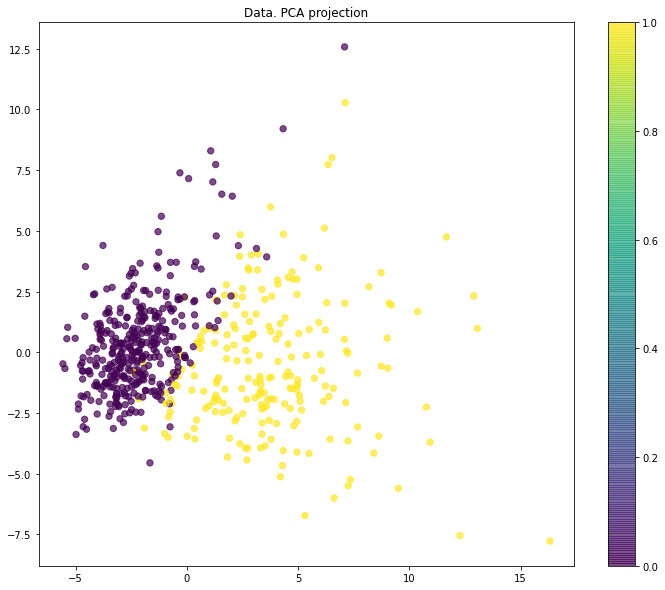

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('Data. PCA projection')

## t-SNE
t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

With t-SNE, the picture looks better since PCA has a linear constraint while t-SNE does not. However, even with such a small dataset, the t-SNE algorithm takes significantly more time to complete than PCA.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.237s...
[t-SNE] Computed neighbors for 569 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.426056
[t-SNE] KL divergence after 1650 iterations: 0.925584


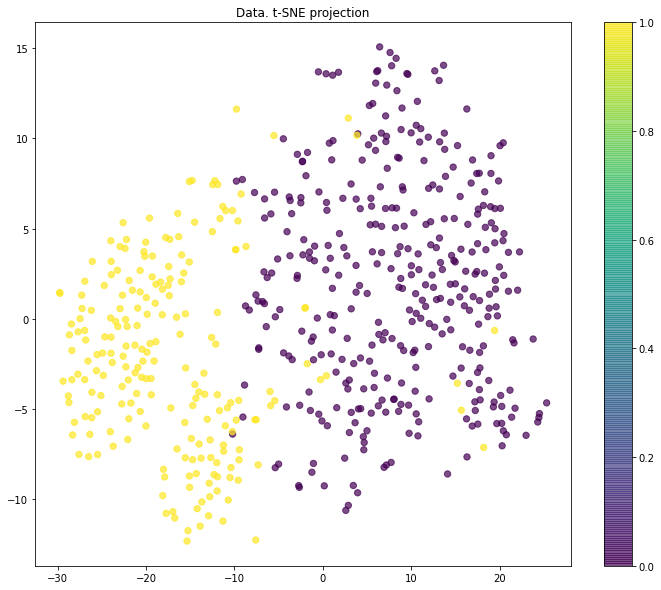

In [15]:
# Invoke the TSNE method
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000,random_state = 17)

df_tsne_scaled = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12,10))
plt.scatter(df_tsne_scaled[:, 0], df_tsne_scaled[:, 1], c=df['diagnosis'], 
            alpha=0.7, s=40)
plt.colorbar()
plt.title('Data. t-SNE projection');

In practice, we would choose the number of principal components such that we can explain 90% of the initial data dispersion (via the explained_variance_ratio). Here, that means retaining 6 principal components; therefore, we reduce the dimensionality from 30 features to 6.

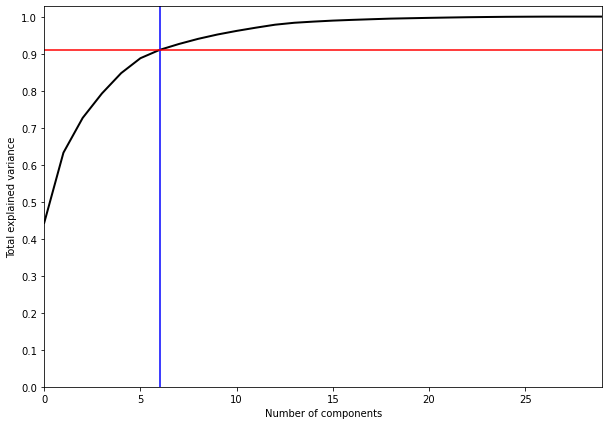

In [16]:
pca = decomposition.PCA().fit(X_scaled)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show()

As it can be seen, that the first 6 components correspond to approximately 91% of the cumulative sum over all the variance. I am going to stick with PCA, since it provides similar results to t-SNE and takes less time to compute the components. And later, I will compare classification performance for the initial dataset and for pca components.

Data cleaning
As the dataset is not large, I am not going to remove any outliers in order to keep as much data as possible. But to avoid multicollinearity, I will remove some of the features to prevent overfitting. From the EDA we now know that radius, perimeter, and area are highly correlated, which makes sense. That is why it would be better to remove, say, perimeter, and area, as well as all features from "worst" samples, since worst (or largest) instances are also considered in the initial sample, which means and standart errors were computed for, therefore it leads to high correlation (>0.80), which is not surprising, too. For example, the correlation between radius_worst and radius_mean is 0.97, for texture_mean and texture_worst pair it equals to 0.91, and so on and so forth.

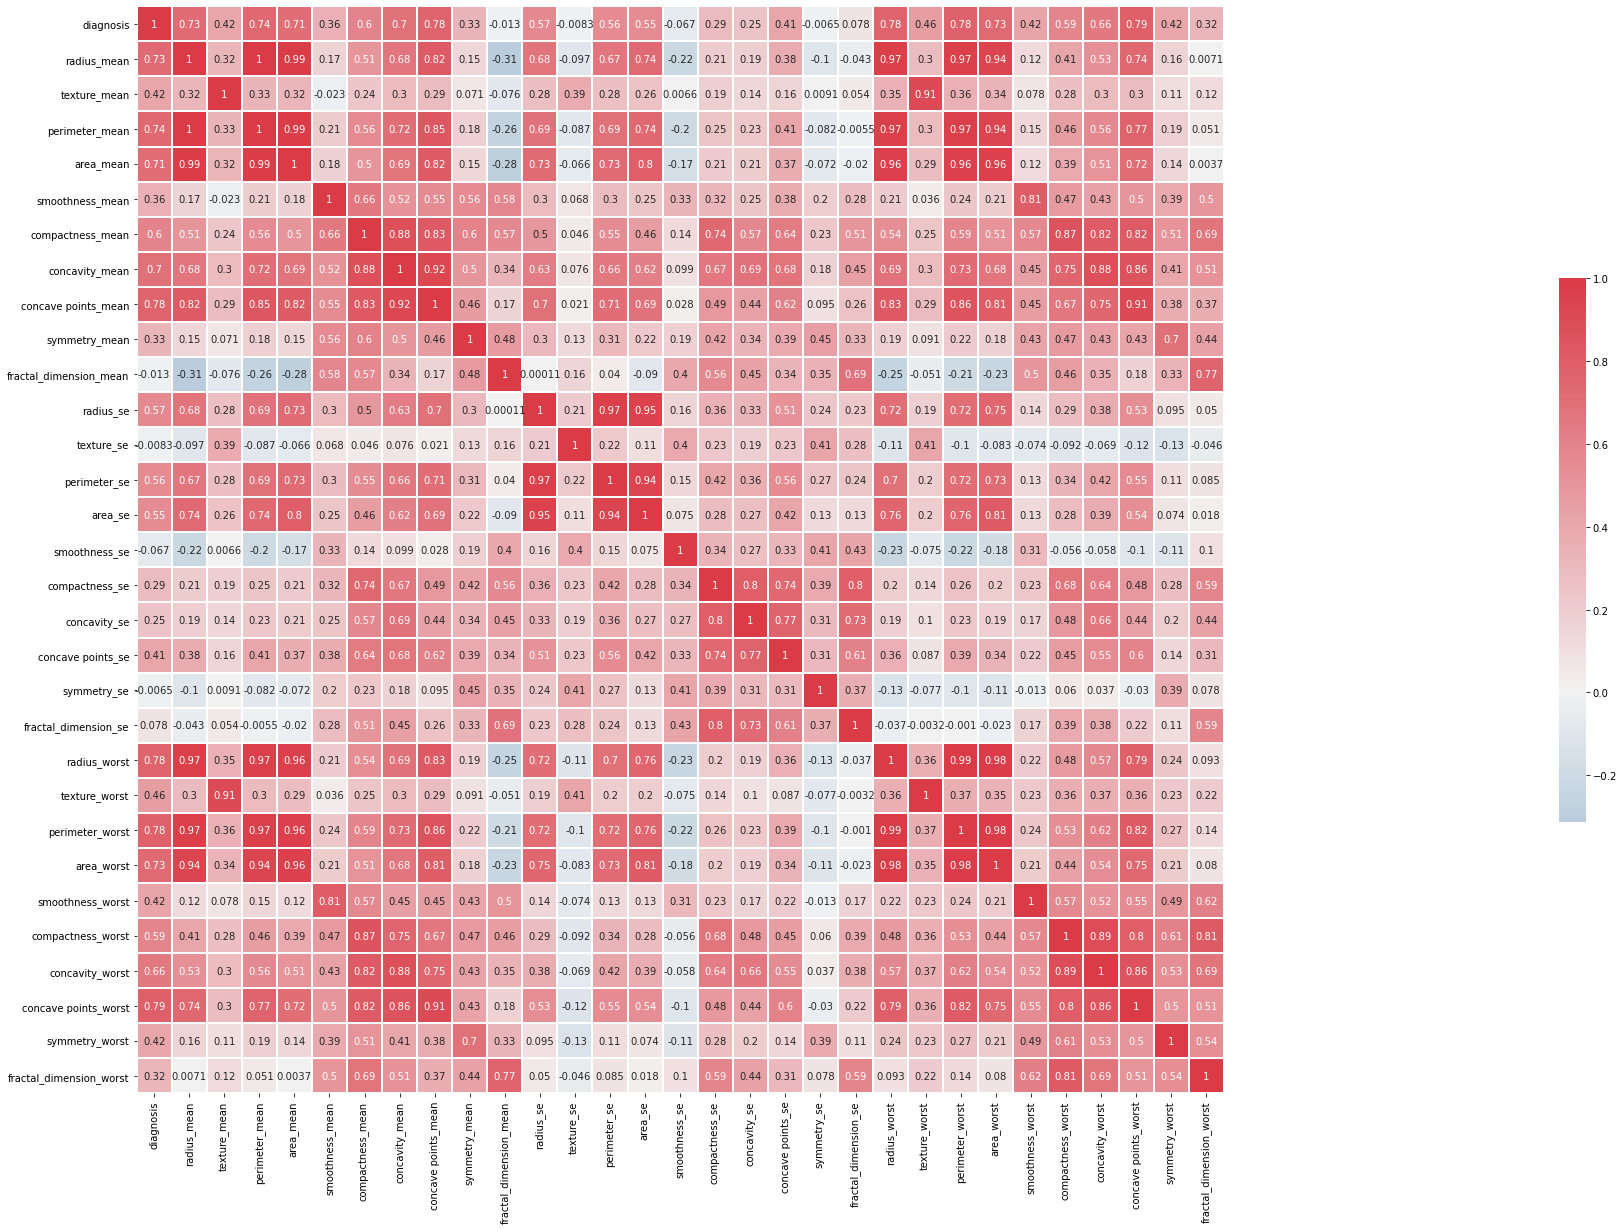

In [17]:
corr = df.corr()
cmap = sns.diverging_palette(240,10, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(120, 20))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=1, cbar_kws={"shrink": .5});

In [18]:
perimeters = [x for x in df.columns if 'perimeter' in x]
areas = [x for x in df.columns if 'area' in x]
df.drop(perimeters, axis = 1 ,inplace = True)
df.drop(areas, axis = 1 ,inplace = True)
worst = [col for col in df.columns if col.endswith('_worst')]
df.drop(worst, axis = 1 ,inplace = True)

## Normalization
The Standard Scaler is one of the most widely used scaling algorithms. It assumes that the data follows a Gaussian distribution. Before scaling numerical features, I have to check whether they follow normal distribution:

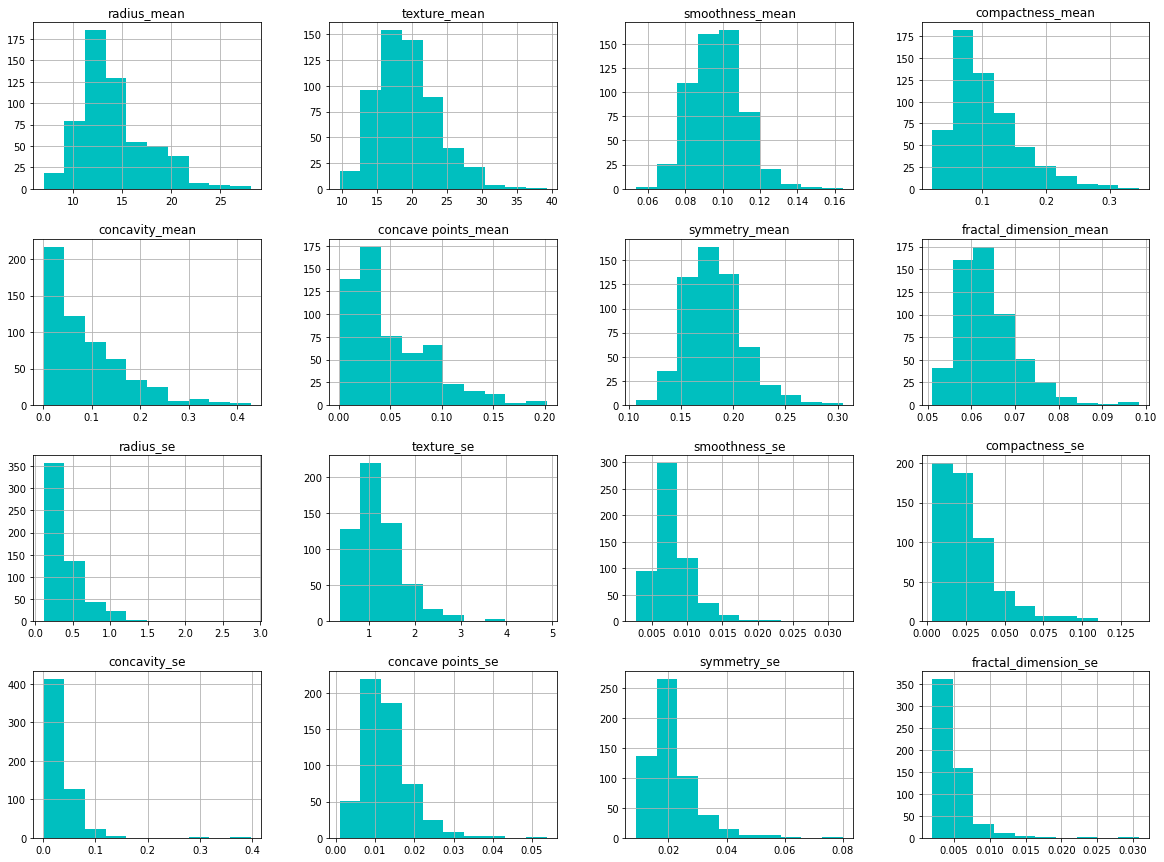

In [19]:
X = df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

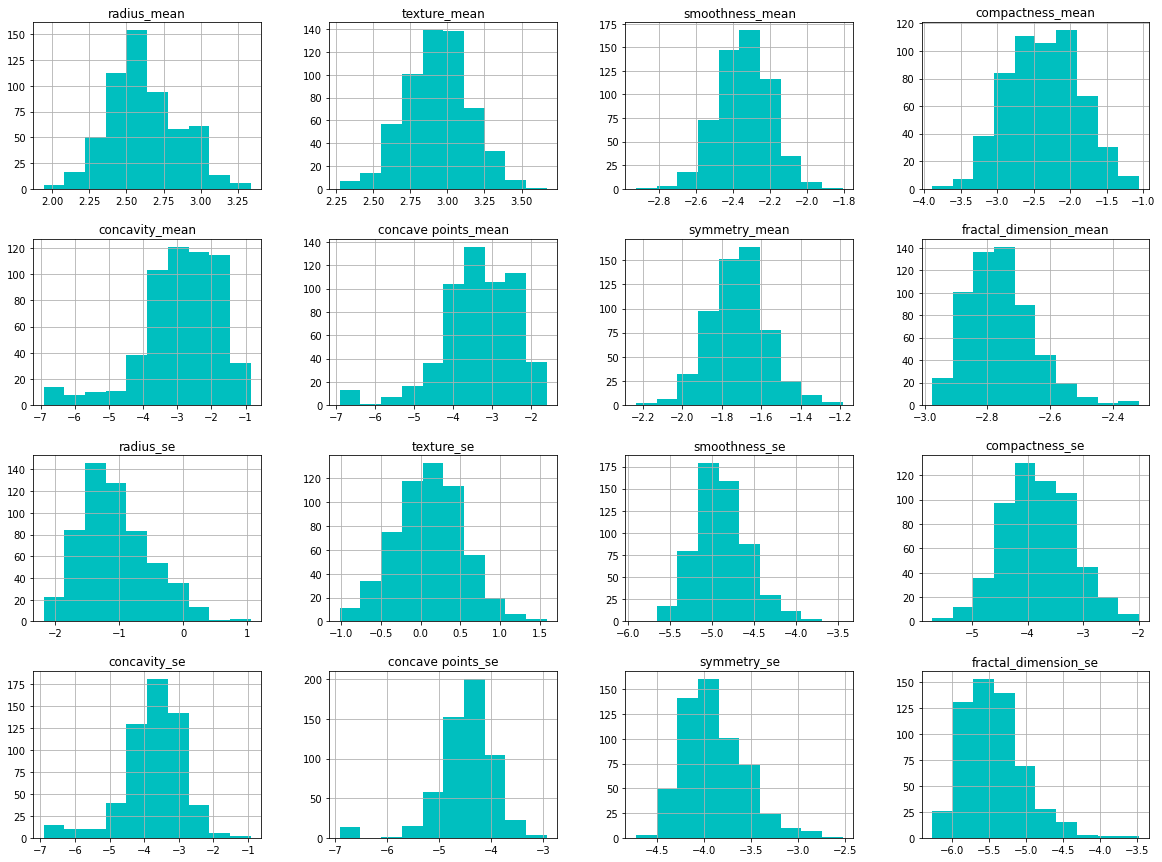

In [20]:
#Log transformation
X = df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

## SVM 

In [21]:
from sklearn.model_selection import train_test_split

#Scaler should be trained on train set only to prevent information about future from leaking.

y = df['diagnosis']

X_log_train, X_log_holdout, y_train, y_holdout = train_test_split(X_log, y, test_size=0.3, random_state=17)

In [22]:
from sklearn.svm import SVC
name_model=SVC()

In [23]:
from sklearn.svm import SVC
SVM_model = SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
SVM_model.fit(X_log_train,y_train)

ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'auto_deprecated' instead.

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
svm_pred = SVM_model.predict(X_log_holdout)
print ("Accuracy Score : ",accuracy_score(y_holdout, svm_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, svm_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, svm_pred))

AttributeError: 'SVC' object has no attribute 'shape_fit_'

## Decision tree
Let's find out what are the best parameters for the Decision tree with GridSearch:

In [25]:
from sklearn.model_selection import GridSearchCV

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(random_state=17)

tree_params = {'max_depth': range(1,5), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_grid = GridSearchCV(tree, tree_params, cv=10, scoring='recall')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'max_features': range(3, 6)},
             scoring='recall')

In [26]:
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'entropy', 'max_depth': 2, 'max_features': 4}, 0.95375)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
tree_pred = tree_grid.predict(X_holdout)
print ("Accuracy Score : ",accuracy_score(y_holdout, tree_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, tree_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, tree_pred))

Accuracy Score :  0.9181286549707602
Recall Score (how much of malignant tumours were predicted correctly) :  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.8309859154929577


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_holdout, tree_pred)

array([[98, 12],
       [ 2, 59]], dtype=int64)

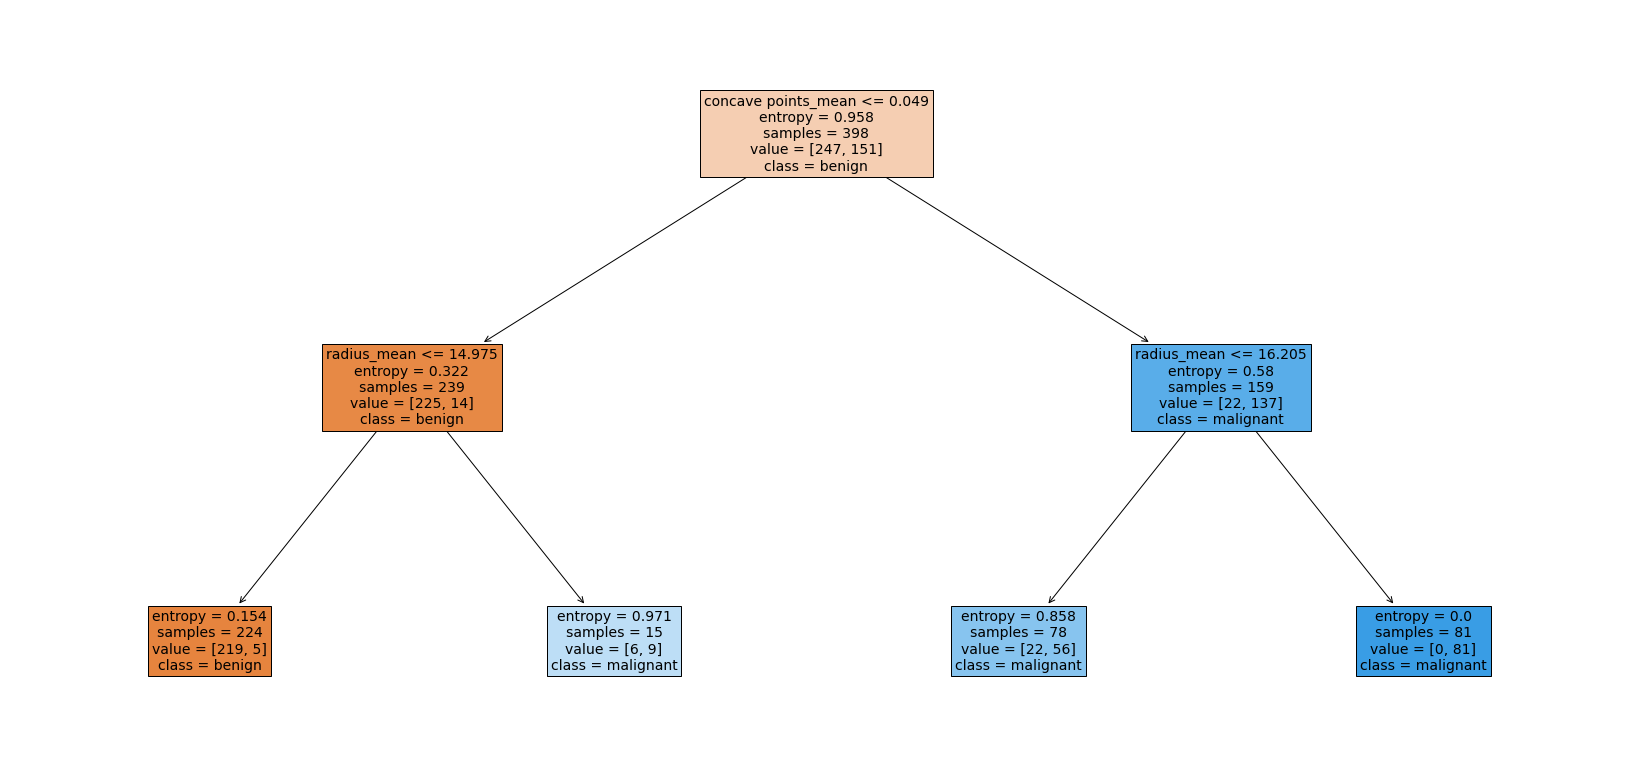

In [29]:
from sklearn import tree    
from sklearn.tree import plot_tree    
plt.figure(figsize=(29,14))     
plot_tree(tree_grid.best_estimator_, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns,filled=True,fontsize=14)   
plt.show()    

## Logistic Regression

with normalized data

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [31]:
Cs = np.logspace(-1, 8, 5)

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=17,
                                                           solver='liblinear'))]),
             param_grid={'lr__C': array([1.00000000e-01, 1.77827941e+01, 3.16227766e+03, 5.62341325e+05,
       1.00000000e+08])},
             scoring='recall')

In [32]:
lr_pipe_grid.best_params_, lr_pipe_grid.best_score_

({'lr__C': 3162.2776601683795}, 0.9608333333333334)

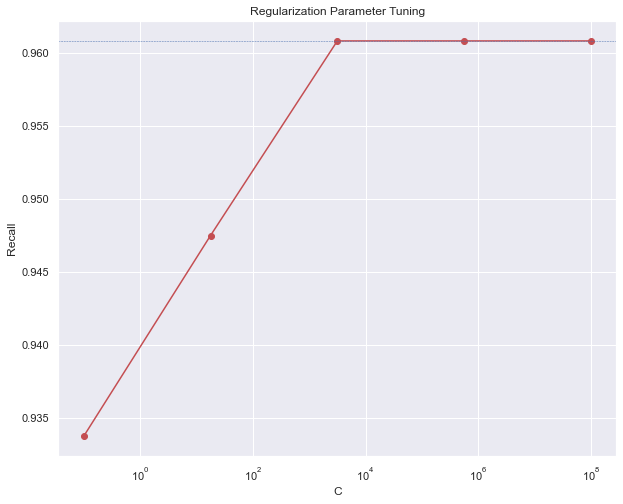

In [33]:
scores=[]
for C in Cs:
    pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=C, random_state=17,solver='liblinear'))])
    scores.append(cross_val_score(pipe,X_log_train, y_train,cv=10, scoring='recall').mean())
score_C_1 = lr_pipe_grid.best_score_
sns.set()
plt.figure(figsize=(10,8))
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Regularization Parameter Tuning')
# horizontal line -- model quality with default C value
plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

In [34]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_pipe_grid.predict(X_log_holdout)))

Accuracy Score :  0.9532163742690059
Recall Score (how much of malignant tumours were predicted correctly) :  0.9016393442622951
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9649122807017544


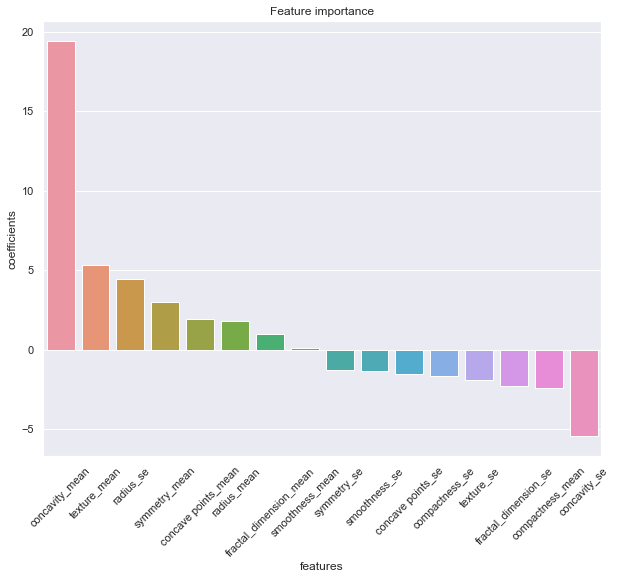

In [35]:
lr_best_pipe = lr_pipe_grid.best_estimator_.named_steps['lr']
#Create Data frame of Regression coefficients
coef= pd.DataFrame(lr_best_pipe.coef_.ravel())
#Merge Regression coefficients with feature names
df_columns = pd.DataFrame(df.drop(['diagnosis'], axis=1).columns)
coef_and_feat = pd.merge(coef,df_columns,left_index= True,right_index= True, how = "left")
coef_and_feat.columns = ["coefficients","features"]
coef_and_feat = coef_and_feat.sort_values(by = "coefficients",ascending = False)
#Set up the matplotlib figure
plt.rcParams['figure.figsize'] = (10,8)
# Let's draw top 10 important features 
sns.barplot(x = 'features', y = 'coefficients', data = coef_and_feat).set_title('Feature importance')
plt.xticks(rotation=45);

with non-normalized data

In [36]:
C_scores = np.logspace(-1, 8, 5)

lr = LogisticRegression(random_state=17,solver='liblinear')

lr_params = {'C': C_scores}

lr_grid = GridSearchCV(lr, lr_params, cv=10, scoring='recall')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=17, solver='liblinear'),
             param_grid={'C': array([1.00000000e-01, 1.77827941e+01, 3.16227766e+03, 5.62341325e+05,
       1.00000000e+08])},
             scoring='recall')

In [37]:
lr_grid.best_params_, lr_grid.best_score_

({'C': 562341.3251903491}, 0.9604166666666666)

In [38]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_grid.predict(X_log_holdout)) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, lr_grid.predict(X_log_holdout)))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, lr_grid.predict(X_log_holdout)))

Accuracy Score :  0.3567251461988304
Recall Score (how much of malignant tumours were predicted correctly) :  1.0
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.3567251461988304


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

#Stratified split for the validation process
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

#initialize the set of parameters for exhaustive search and fit to find out the optimal parameters
rfc_params = {'max_features': range(7,11), 'min_samples_leaf': range(1,3), 'max_depth': range(9,13), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(n_estimators=30, random_state=17, n_jobs= -1)

gcv = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(X_train, y_train)

gcv.best_params_, gcv.best_score_

#RandomForest classifier with the default parameters 
#rfc = RandomForestClassifier(n_estimators=100, criterion ='gini', max_depth = 8, max_features = 6, min_samples_leaf = 1, random_state = 17, n_jobs=-1)

({'criterion': 'gini',
  'max_depth': 9,
  'max_features': 9,
  'min_samples_leaf': 1},
 0.9208333333333334)

In [40]:
forest_pred = gcv.predict(X_holdout)

print ("Accuracy Score : ",accuracy_score(y_holdout, forest_pred) )
print ("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, forest_pred))
print ("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, forest_pred))

Accuracy Score :  0.9473684210526315
Recall Score (how much of malignant tumours were predicted correctly) :  0.9180327868852459
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9333333333333333


In [41]:
rfc = gcv.best_estimator_
estimators_tree_98 = rfc.estimators_[5]
estimators_tree_3 = rfc.estimators_[4]
estimators_tree_47 = rfc.estimators_[3]
estimators_tree_3.n_features_

16

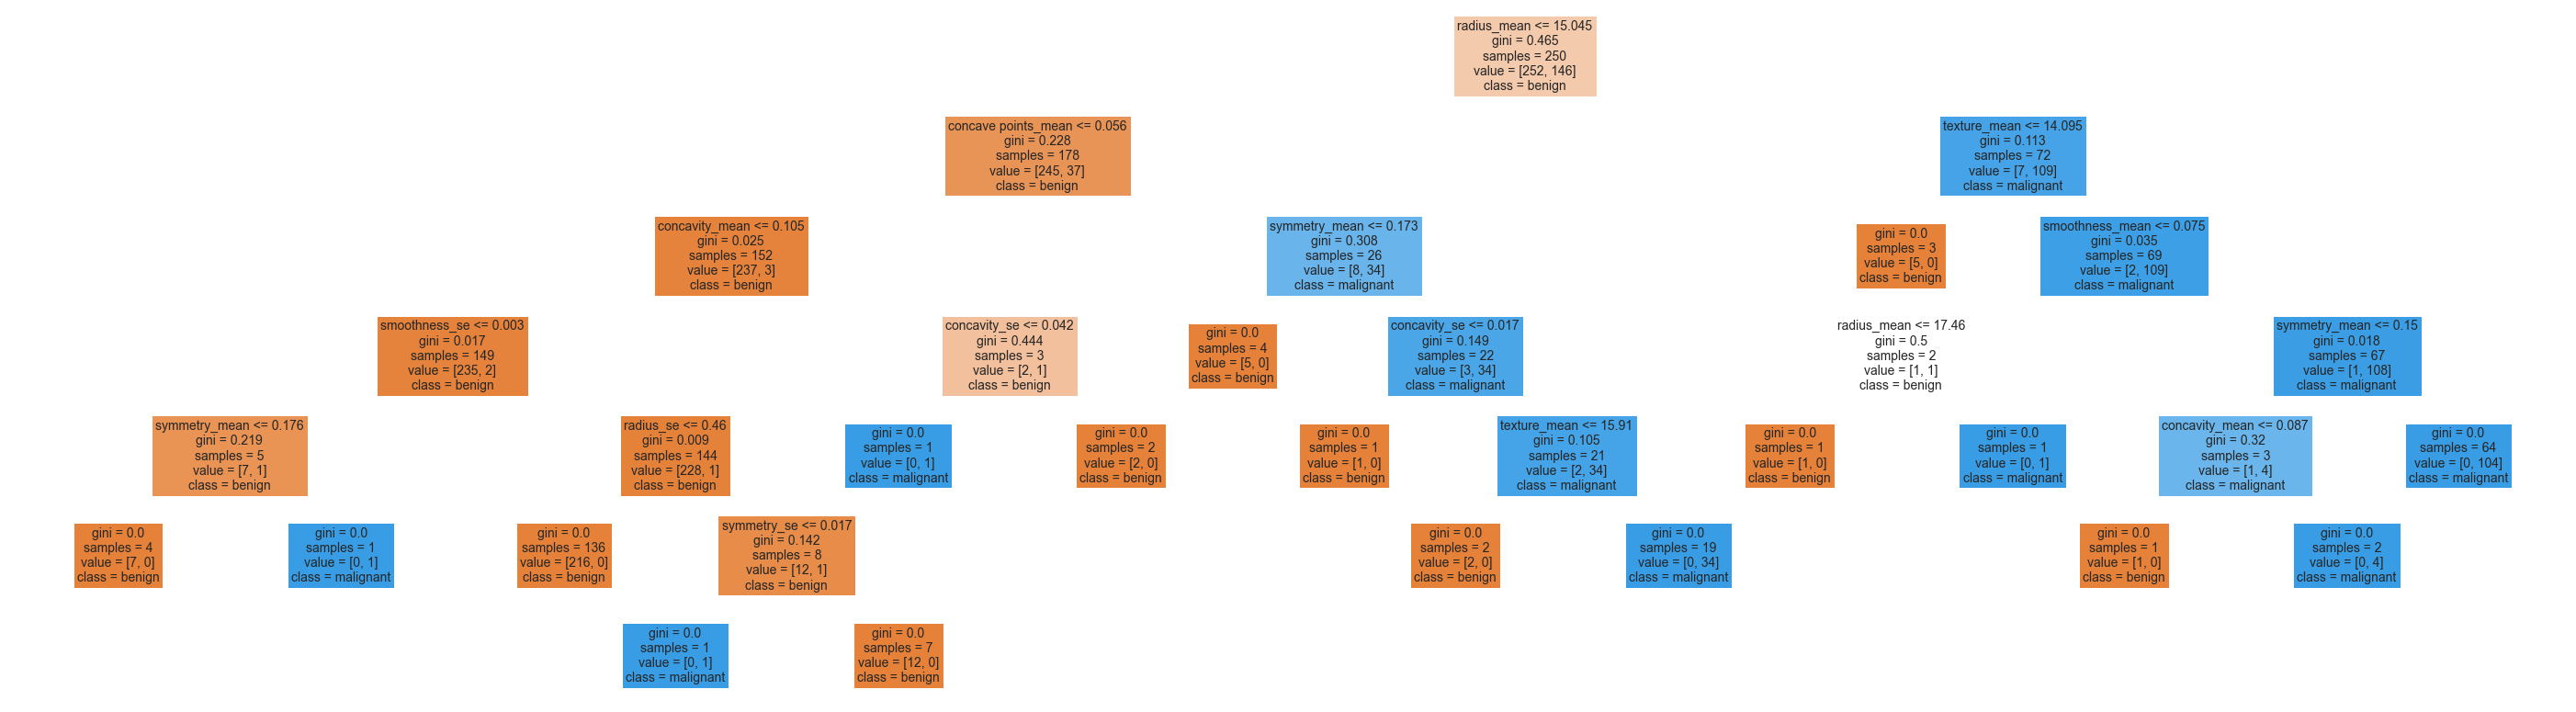

<Figure size 720x576 with 0 Axes>

In [42]:
from sklearn import tree    #import tree module
from sklearn.tree import plot_tree    #import
plt.figure(figsize=(50,14))    #resize the board 
plot_tree(estimators_tree_98, class_names = ['benign', 'malignant'], feature_names = df.drop(['diagnosis'], axis=1).columns,filled=True,fontsize=14)    #plot the tree
plt.show()
plt.savefig("Tree.png")

Now let's fit RF on scaled data:

In [43]:
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=100, random_state=17, n_jobs= -1))])

In [44]:
rf_params = {'rf__max_features': range(3,10), 'rf__min_samples_leaf': range(1,3), 'rf__max_depth': range(5,12), 'rf__criterion':['gini','entropy']}

In [45]:
rf_pipe_grid = GridSearchCV(rf_pipe, rf_params, cv=10, scoring='recall')

In [46]:
# with namorization
rf_pipe_grid.fit(X_log_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=17))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': range(5, 12),
                         'rf__max_features': range(3, 10),
                         'rf__min_samples_leaf': range(1, 3)},
             scoring='recall')

In [47]:
rf_pipe_grid.best_params_, rf_pipe_grid.best_score_

({'rf__criterion': 'entropy',
  'rf__max_depth': 6,
  'rf__max_features': 8,
  'rf__min_samples_leaf': 1},
 0.9208333333333334)

In [48]:
print("Accuracy Score on scaled data: ",accuracy_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)) )
print("Recall Score (how much of malignant tumours were predicted correctly) : ",recall_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))
print("Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",precision_score(y_holdout, rf_pipe_grid.predict(X_log_holdout)))

Accuracy Score on scaled data:  0.9707602339181286
Recall Score (how much of malignant tumours were predicted correctly) :  0.9672131147540983
Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.9516129032258065
